<a href="https://colab.research.google.com/github/laxmipunnam/2216132_AIML_BootCamp/blob/main/dataset_json(day_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
df = pd.read_json("/content/drive/MyDrive/dataset.json", lines= True)

In [4]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [5]:
df.shape

(20001, 3)

In [6]:
#data processing
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])

df

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1
...,...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN,0
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN,0


In [7]:
df.label.unique()

array(['1', '0'], dtype=object)

In [8]:
df.extras.unique()

array([nan])

In [9]:
df["notes"] = df.annotation.apply(lambda x: x.get('notes'))
df.notes.unique()

array([''], dtype=object)

In [10]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])
df

,content,annotation,extras,label,notes
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1,
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1,
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1,
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1,
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1,
...,...,...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN,0,
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN,0,
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN,0,
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN,0,


In [11]:
df = df.drop(['annotation','extras','notes'],axis='columns')
df

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [12]:
bully = df[df.label==1]
nonbully = df[df.label==0]

In [13]:
print(bully)
print(nonbully)

Empty DataFrame
Columns: [content, label]
Index: []
Empty DataFrame
Columns: [content, label]
Index: []


In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True


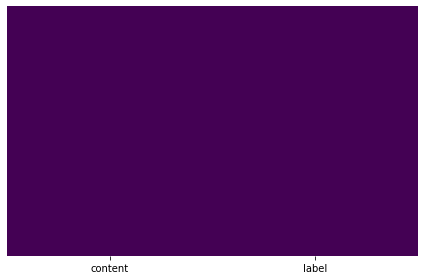

In [15]:
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [16]:
#load the data
X = df.iloc[:,:-1].values#independent -- message
Y = df.iloc[:,-1:].values #dependent -- label
X

array([[' Get fucking real dude.'],
       [" She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ..."],
       [" why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here."],
       ...,
       ['  hahahahaha >:) im evil mwahahahahahahahahaha'],
       [' What&;s something unique about Ohio? :)'],
       [' Who is the biggest gossiper you know?']], dtype=object)

In [17]:
Y

array([['1'],
       ['1'],
       ['1'],
       ...,
       ['0'],
       ['0'],
       ['0']], dtype=object)

In [18]:
#spilt the data set--> method 2
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1,shuffle=True)
X_train

array([['You know all about some interpretive gay dancing.'],
       ['depends on your plan. if you pay out the ass for it  no.'],
       ["ripping off Emo Phillips + ba-dum-bum jokes wouldn't get my vote even if i was the web-voter type."],
       ...,
       ['ass get out its ur last day damn it!'],
       ['fucking awesome - I need to play that again'],
       ['fuck duke!']], dtype=object)

In [19]:
X_train.shape

(16000, 1)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()

#transform the training data into freq vectors and return the matrix

training_data = count_vector.fit_transform(X_train.flatten())

#transform the testing data into freq vectors and return the matrix

testing_data = count_vector.transform(X_test.flatten())

training_data

<16000x15259 sparse matrix of type '<class 'numpy.int64'>'
	with 180431 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(training_data,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [22]:
y_pred=model.predict(testing_data)
np.set_printoptions(precision=2) 
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [23]:
print("Predicted value for training data:",model.score(training_data,Y_train)*100)
print("Predicted value for testing data:",model.score(testing_data,Y_test)*100)

Predicted value for training data: 88.2125
Predicted value for testing data: 79.33016745813546


logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(training_data,Y_train)
y_pred=model1.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['1' '0']
 ['1' '1']]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
print("Predicted value for training data (LogisticRegression):",model1.score(training_data,Y_train)*100)
print("Predicted value for testing data (LogisticRegression):",model1.score(testing_data,Y_test)*100)

Predicted value for training data (LogisticRegression): 93.28125
Predicted value for testing data (LogisticRegression): 82.50437390652337


svc

In [28]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(training_data,Y_train)
y_pred=model4.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [29]:
print("Predicted value for training data(SVC):",model4.score(training_data,Y_train)*100)
print("Predicted value for testing data (SVC):",model4.score(testing_data,Y_test)*100)


Predicted value for training data(SVC): 96.00625000000001
Predicted value for testing data (SVC): 87.95301174706324


random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()
model6.fit(training_data,Y_train)
y_pred=model6.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[['1' '0']
 ['0' '0']
 ['1' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [31]:
print("Predicted value for training data(RandomForestClassifier):",model6.score(training_data,Y_train)*100)
print("Predicted value for testing data(RandomForestClassifier):",model6.score(testing_data,Y_test)*100)

Predicted value for training data(RandomForestClassifier): 99.56875
Predicted value for testing data(RandomForestClassifier): 92.42689327668083


knn

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(training_data,Y_train)
y_pred=model2.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [35]:
print("Predicted value for training data(knn):",model2.score(training_data,Y_train)*100)
print("Predicted value for testing data(knn):",model2.score(testing_data,Y_test)*100)

Predicted value for training data(knn): 81.46875
Predicted value for testing data(knn): 69.85753561609597


decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()
model5.fit(training_data,Y_train)
y_pred=model5.predict(testing_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [33]:
print("Predicted value for training data (DecisionTreeClassifier):",model5.score(training_data,Y_train)*100)
print("Predicted value for testing data (DecisionTreeClassifier):",model5.score(testing_data,Y_test)*100)

Predicted value for training data (DecisionTreeClassifier): 99.56875
Predicted value for testing data (DecisionTreeClassifier): 85.32866783304173
